In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
import itertools    
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, f1_score

# Reading & Exploring the dataset

In [4]:
file = pd.read_csv("./preprocessed_kindle_review .csv")
file.head(5)

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [5]:
file.shape

(12000, 4)

In [7]:
data= file[['rating', 'reviewText']]
data

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."
...,...,...
11995,2,Had to read certain passages twice--typos. Wi...
11996,3,Not what i expected. yet a very interesting bo...
11997,5,Dragon Knights is a world where Knights ride d...
11998,4,"Since this story is very short, it's hard to s..."


In [8]:
data.isnull().sum()

rating        0
reviewText    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rating      12000 non-null  int64 
 1   reviewText  12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 281.2+ KB


In [13]:
rate_list = data[(data['rating'] == 1)]
rate_list

,rating,reviewText
1,1,"When I read the description for this book, I c..."
9,1,I bought this set and returned it. I couldn't...
11,1,The only thing that got me to the end of this ...
31,1,The premise of this book was totally disgustin...
33,1,Can you review a novel that you didn't finish?...
...,...,...
11968,1,It made me feel uncomfortable when I started t...
11972,1,"after reading the first part of this story, i ..."
11973,1,This story was more a rough draft than anythin...
11988,1,Nothing makes me madder than to start reading ...


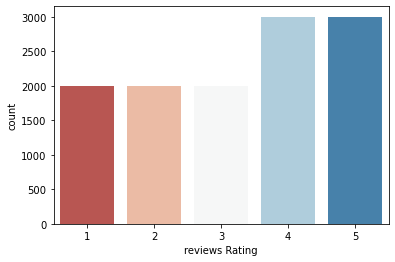

In [14]:
plt.figure()
sns.countplot(x='rating', data=data, palette='RdBu')
plt.xlabel('reviews Rating')
plt.show()
#SMOTE technique ??

converting rating to 0 and 1 from 1-5

In [81]:
data["rating"] = data["rating"].apply(lambda x: 0 if x < 3 else 1) # positive as 1 and negative as 0
data

,rating,reviewText
0,0,"[book, bookmobile, book, bought, school, book,..."
1,0,"[read, description, book, wait, read, download..."
2,0,"[edit, review, book, believe, updated, thank, ..."
3,0,"[normally, buy, novel, time, decided, chance, ..."
4,0,"[book, normally, read, try, limit, genre, some..."
...,...,...
11995,0,"[read, passage, twice, typo, wish, built, rela..."
11996,0,"[expected, book, usually, read, book, era]"
11997,0,"[dragon, knight, world, knight, ride, dragon, ..."
11998,0,"[story, short, hard, giving, plot, story, war,..."


In [17]:
y = rate_list['rating']
x = rate_list['reviewText'].reset_index()

In [18]:
len(y)
print(y)

1        1
9        1
11       1
31       1
33       1
        ..
11968    1
11972    1
11973    1
11988    1
11992    1
Name: rating, Length: 2000, dtype: int64


In [19]:
X=x['reviewText']
print(X)

0       When I read the description for this book, I c...
1       I bought this set and returned it.  I couldn't...
2       The only thing that got me to the end of this ...
3       The premise of this book was totally disgustin...
4       Can you review a novel that you didn't finish?...
                              ...                        
1995    It made me feel uncomfortable when I started t...
1996    after reading the first part of this story, i ...
1997    This story was more a rough draft than anythin...
1998    Nothing makes me madder than to start reading ...
1999    I thought the description of this book was int...
Name: reviewText, Length: 2000, dtype: object


# Preparing the Data

In [20]:
import nltk

In [21]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

In [23]:
data["reviewText"]=data["reviewText"].str.lower() 

#tokenization of words
data['reviewText'] = data.apply(lambda row: word_tokenize(row['reviewText']), axis=1) 

#only alphanumerical values
data["reviewText"] = data['reviewText'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
data['reviewText'] = data['reviewText'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
data['reviewText'] = data['reviewText'].apply(lambda x: [item for item in x if item not in stop])

In [24]:
data.head()

,rating,reviewText
0,1,"[book, bookmobile, book, bought, school, book,..."
1,0,"[read, description, book, wait, read, download..."
2,1,"[edit, review, book, believe, updated, thank, ..."
3,1,"[normally, buy, novel, time, decided, chance, ..."
4,1,"[book, normally, read, try, limit, genre, some..."


In [25]:
len(data[data["rating"]==0]),len(data[data["rating"]==1])

(4000, 8000)

In [26]:
vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(data["reviewText"].astype('str'))

## Model Selection

I implemented Logistic Regression, Random Forest, Naive Bayes, and XGBOOST algorithms.

In [53]:
x_train, x_test, y_train, y_test = train_test_split(text, data["rating"], test_size=0.2, random_state=1)

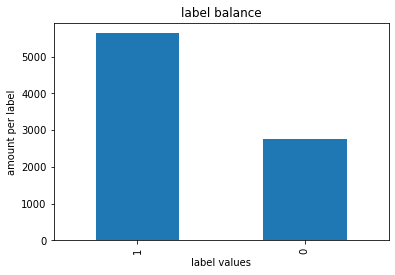

In [28]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [35]:
def eval_model(y,y_predicted):
    print("F1 score of the model")
    print(f1_score(y,y_predicted,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_predicted))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_predicted)*100,3),"%")

##  Logistic Regression

In [54]:
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)
y_pred_LR = classifier.predict(x_test)
y_pred_tr_LR = classifier.predict(x_train)

In [55]:
LR= round(accuracy_score(y_test,y_pred_LR)*100,3)
#print('Test accuracy', sum(y_test == y_pred_LR)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr_LR)/len(y_train))
eval_model(y_test,y_pred_LR)

Train accuracy 0.8921875
F1 score of the model
0.81625
Accuracy of the model
0.81625
Accuracy of the model in percentage
81.625 %


## Naive Bayes

In [56]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
y_pred_NB = classifier.predict(x_test)
y_pred_tr_NB = classifier.predict(x_train)

In [57]:
NB= round(accuracy_score(y_test,y_pred_LR)*100,3)
print('Train accuracy', sum(y_train == y_pred_tr_NB)/len(y_train))
eval_model(y_test,y_pred_NB)

Train accuracy 0.7670833333333333
F1 score of the model
0.7204166666666667
Accuracy of the model
0.7204166666666667
Accuracy of the model in percentage
72.042 %


## Random Forest

In [58]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred_RF = classifier.predict(x_test)
y_pred_tr_RF = classifier.predict(x_train)

In [59]:
RF= round(accuracy_score(y_test,y_pred_RF)*100,3)
print('Train accuracy', sum(y_train == y_pred_tr_RF)/len(y_train))
eval_model(y_test,y_pred_RF)

Train accuracy 1.0
F1 score of the model
0.7879166666666667
Accuracy of the model
0.7879166666666667
Accuracy of the model in percentage
78.792 %


## XGBoost

In [40]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [60]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
y_pred_XG= classifier.predict(x_test)
y_pred_tr_XG = classifier.predict(x_train)

C:\Users\Laptop\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:02:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
XGB=round(accuracy_score(y_test,y_pred_XG)*100,3)
print('Train accuracy', sum(y_train == y_pred_tr_XG)/len(y_train))
eval_model(y_test,y_pred_XG)

Train accuracy 0.9210416666666666
F1 score of the model
0.79875
Accuracy of the model
0.79875
Accuracy of the model in percentage
79.875 %


# Compare Accuracy

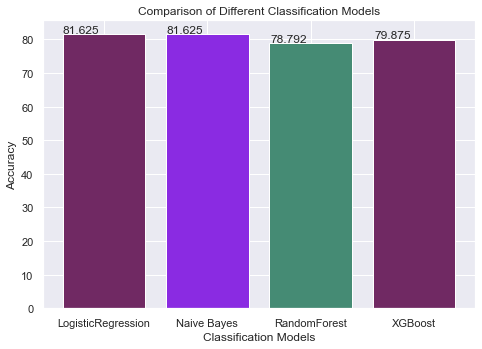

In [65]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
Models = ['LogisticRegression','Naive Bayes','RandomForest' , 'XGBoost']
Accuracy=[LR, NB, RF, XGB]
ax.bar(Models, Accuracy, color=['#702963','#8a2be2', '#458B74', '#702963'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Comparison of Different Classification Models')
plt.ylabel('Accuracy');
plt.xlabel('Classification Models')
plt.show()

# Cofusion matrix

In [72]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [73]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

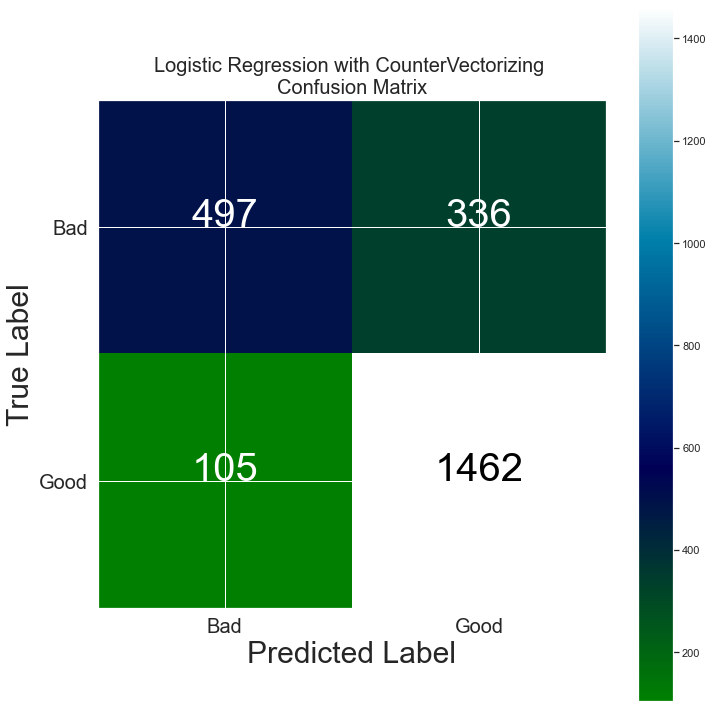

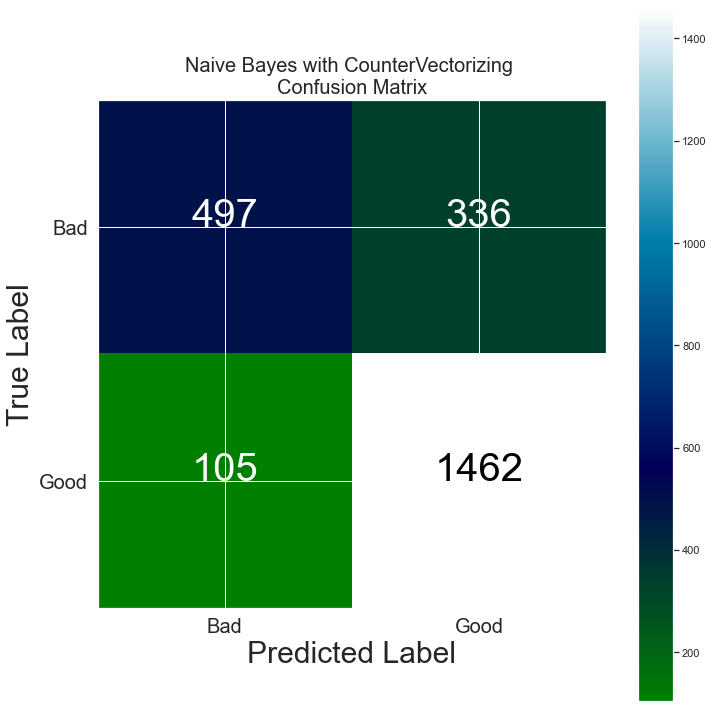

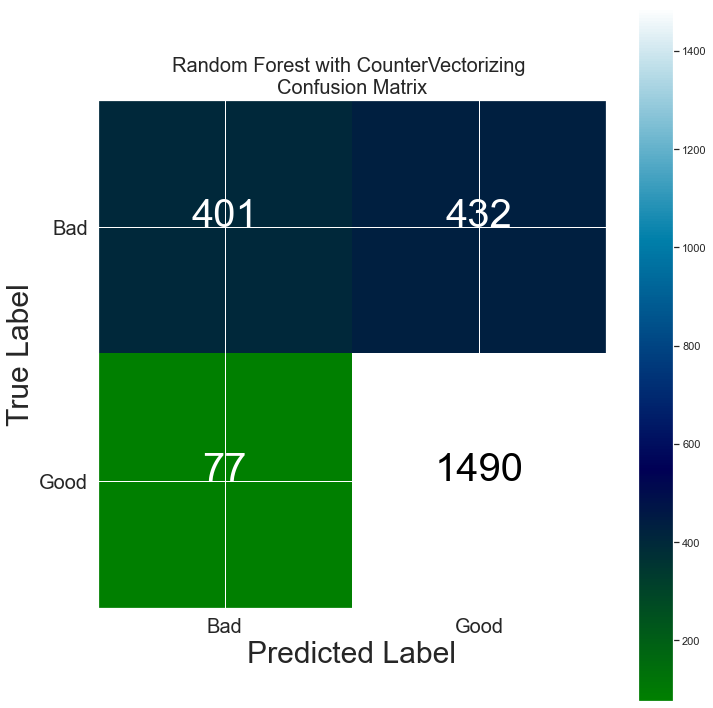

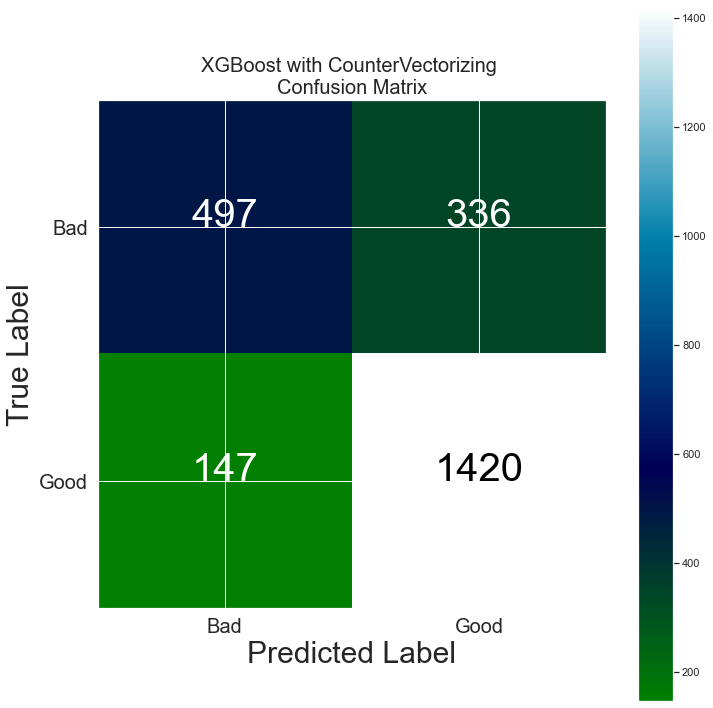

In [74]:
disp_confusion_matrix(y_pred_LR, "Logistic Regression")
disp_confusion_matrix(y_pred_LR, "Naive Bayes")
disp_confusion_matrix(y_pred_RF, "Random Forest")
disp_confusion_matrix(y_pred_XG, "XGBoost")
